In [ ]:
import os,warnings;warnings.filterwarnings("ignore")
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid',font_scale=0.8)
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.neighbors as ne 
import pandas as pd

In [ ]:
df=pd.read_csv("C:\Users\HP\Downloads\kidney_disease (1).csv")
print(df.shape)
df['classification'] = df['classification'].apply(lambda x: 1 if x == 'ckd' else 0)
print(df.head())

In [ ]:
#Checking for not nulls
df.isnull().sum()

In [ ]:
df = df.drop('id',axis=1)


In [ ]:
display(df.describe())

In [148]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['rbc']=lb.fit_transform(df['rbc'])
df['pc']=lb.fit_transform(df['pc'])
df['pcc']=lb.fit_transform(df['pcc'])
df['ba']=lb.fit_transform(df['ba'])
df['htn']=lb.fit_transform(df['htn'])
df['dm']=lb.fit_transform(df['dm'])
df['cad']=lb.fit_transform(df['cad'])
df['appet']=lb.fit_transform(df['appet'])
df['pe']=lb.fit_transform(df['pe'])
df['ane']=lb.fit_transform(df['ane'])

In [149]:
df['age']=df['age'].fillna(df['age'].mean()) 
df.shape

(400, 25)

In [150]:
df.replace('\t?', float('nan'), inplace=True)  # Replace '\t?' with NaN

# Convert the relevant columns to float
columns_to_convert = [ 'bp',     'sg',   'al' ,  'su',  'rbc',  'pc',  'pcc' , 'ba'  ,'bgr', 'bu', 'sc', 'sod', 'pot' ,'hemo' ,'pcv' , 'wc' , 'rc' ,'htn',  'dm'  ,'cad',  'appet' , 'pe' , 'ane' ]  # Replace with the actual column names
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

In [151]:
df.columns
df.shape

(205, 25)

In [152]:
df['classification'].value_counts()

0    124
1     81
Name: classification, dtype: int64

In [153]:
X=df.iloc[:,:24]
y=df['classification']

In [154]:
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=SEED)
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict y_pred
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))


Logistic Regression : 0.984
K Nearest Neighbours : 0.919
Decision Tree : 0.935


|--- feature_11 <= 0.06
|   |--- feature_18 <= 0.25
|   |   |--- class: 0
|   |--- feature_18 >  0.25
|   |   |--- feature_14 <= 0.84
|   |   |   |--- class: 1
|   |   |--- feature_14 >  0.84
|   |   |   |--- class: 0
|--- feature_11 >  0.06
|   |--- class: 1



[Text(0.6, 0.875, 'x[11] <= 0.057\ngini = 0.482\nsamples = 143\nvalue = [85, 58]'),
 Text(0.4, 0.625, 'x[18] <= 0.25\ngini = 0.066\nsamples = 88\nvalue = [85, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.6, 0.375, 'x[14] <= 0.844\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]')]

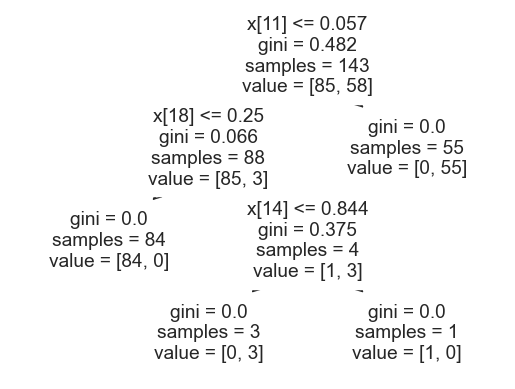

In [156]:
# Decision tree
#Create a Decision Tree classifier with the current max_depth
from sklearn import tree
import sklearn.tree as tr
DT=tr.DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)
trACC=DT.score(X_train,y_train)
tesACC=DT.score(X_test,y_test)

#print(trACC)
#print(tesACC)
model = DT.fit(X_train, y_train)
text_representation = tr.export_text(DT)
print(text_representation)

# To Visualize Decision Tree
tree.plot_tree(model)

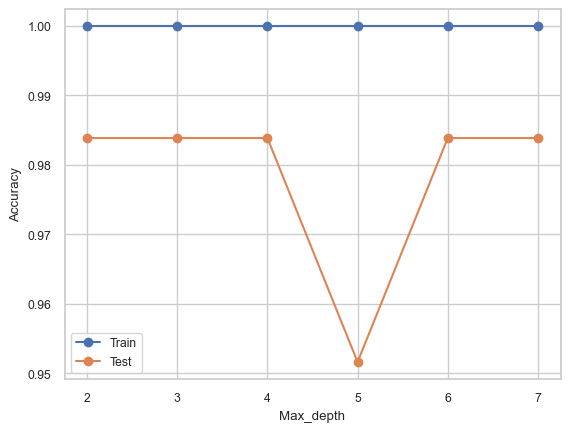

In [157]:
# Decision tree
trACC=[]
tesACC=[]
MD=[]

for i in range(2,8):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train,y_train)
    trACC.append(DT.score(X_train,y_train))
    tesACC.append(DT.score(X_test,y_test))
    MD.append(i)
#print(trACC)
#print(tesACC)
#print(MD)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#print(trACC)
#print(tesACC)

In [158]:
best_score = 0.0
best_k = 0
for k in range(1, 25):
    knn_clf_sk = KNN(n_neighbors=k)
    knn_clf_sk.fit(X_train, y_train)
    score = knn_clf_sk.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
 
print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 1
best_score = 1.0


[1.0, 0.9838709677419355, 0.967741935483871, 0.9354838709677419, 0.9516129032258065, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9032258064516129]
[1.0, 0.9838709677419355, 0.967741935483871, 0.9354838709677419, 0.9516129032258065, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9193548387096774, 0.9032258064516129]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20

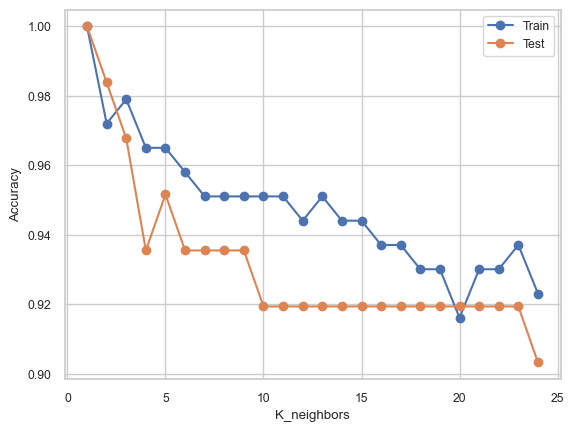

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your data in X_train, X_test, y_train, y_test
test_score=[]
train_score=[]
MD=[]
for i in range(1,25):
    knn=KNN(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_score.append(accuracy_score(y_train, y_pred_train))
    test_score.append(accuracy_score(y_test, y_pred_test))
    MD.append(i)
print(test_score)
print(test_score)
print(MD)  
# Visulaize ACC
plt.figure()
plt.plot(MD, train_score, label='Train',marker='o')
plt.plot(MD, test_score, label='Test',marker='o')
plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms 
import sklearn.svm as sv 
clsfi=sv.SVC(kernel='rbf')
clsfi.fit(X_train,y_train)
Acc_tr=clsfi.score(X_train,y_train)
Acc_tes=clsfi.score(X_test,y_test)
print('Train Accuracy=',Acc_tr)
print('Test Accuracy=',Acc_tes)

Train Accuracy= 0.993006993006993
Test Accuracy= 1.0


[1.0, 1.0, 0.9440559440559441, 0.993006993006993]
[1.0, 0.9838709677419355, 0.9193548387096774, 1.0]


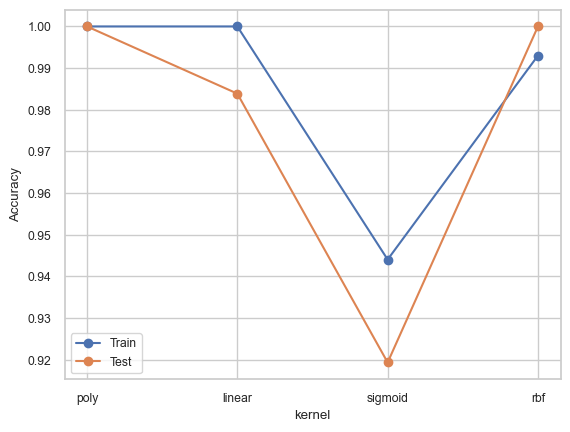

In [161]:
# SVM classification with different kernels
Acc_tr=[]
Acc_tes=[]
kernel=[]

for i in ['poly', 'linear', 'sigmoid', 'rbf']:
    clsfi=sv.SVC(kernel=i, degree=2)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    kernel.append(i)
print(Acc_tr)
print(Acc_tes)    

plt.figure()
plt.plot(Acc_tr,label='Train', marker='o')
plt.plot(Acc_tes,label='Test', marker='o')
plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.993006993006993, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9838709677419355, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9838709677419355, 0.9838709677419355]


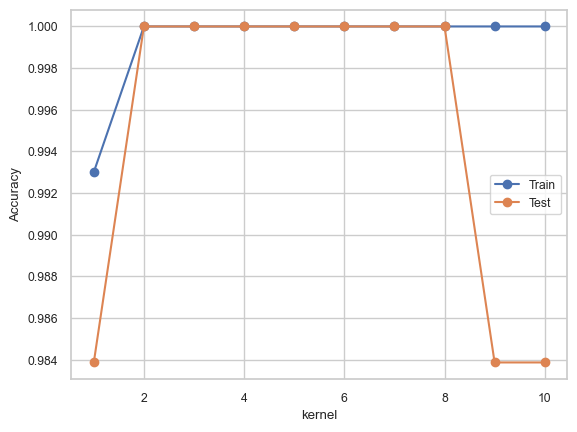

In [162]:
# SVM classification using polynomial kernel with different degrees
Acc_tr=[]
Acc_tes=[]
Degree=[]

for i in range(1,11):
    clsfi=sv.SVC(kernel='poly', degree=i)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    Degree.append(i)
print(Acc_tr)
print(Acc_tes)    

plt.figure()
plt.plot(Degree,Acc_tr,label='Train', marker='o')
plt.plot(Degree, Acc_tes,label='Test', marker='o')
#plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [163]:
import sklearn.naive_bayes as nb
# NB classifier
NB=nb.GaussianNB()
NB.fit(X_train,y_train)
ACC_tr=NB.score(X_train,y_train)
ACC_tes=NB.score(X_test,y_test)
print('Train_Accuracy=', ACC_tr)
print('Test_Accuracy=', ACC_tes)

Train_Accuracy= 0.972027972027972
Test_Accuracy= 0.9516129032258065


In [164]:
# confusion matrix
y_pred = NB.predict(X)
print(y_pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([[121,   3],
       [  4,  77]])